/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


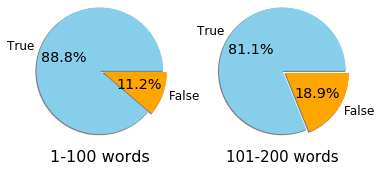

563
642
0.876947040498


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sn
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib.gridspec import GridSpec
categories = json.load(open("../dante_categories.json"))

dataset = pd.read_csv("dante/classificationResults_(logistic_adam).csv").drop("Unnamed: 0",axis=1)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'True', 'False'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
true1=float(len(dataset[dataset["match"]==1][dataset["size"]>0][dataset["size"]<=100]))
total1 = float(len(dataset[dataset["size"]>0][dataset["size"]<=100]))
true2=float(len(dataset[dataset["match"]==1][dataset["size"]>100][dataset["size"]<=200]))
total2 = float(len(dataset[dataset["size"]>100][dataset["size"]<=200]))
sizes1 = [true1/total1, (total1-true1)/total1]
sizes2 = [true2/total2, (total2-true2)/total2]


the_grid = GridSpec(2, 2)
#plt.figure(figsize=(14, 8),dpi=500)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
patches, texts, autotexts = plt.pie(sizes1,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["skyblue","orange"],radius=1.6)
# Make the labels on the small plot easier to read.
plt.xlabel("1-100 words",fontsize=15)
for t in texts:
    t.set_size('large')
for t in autotexts:
    t.set_size('x-large')

ax1.set_xlabel('1-100 words', fontsize = 16)
ax1.xaxis.set_label_coords(0.5, -0.3)


ax2 = plt.subplot(the_grid[0, 1], aspect=1)
patches, texts, autotexts = plt.pie(sizes2,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["skyblue","orange"],radius=1.6)
# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('large')
for t in autotexts:
    t.set_size('x-large')

ax2.set_xlabel('101-200 words', fontsize = 15)
ax2.xaxis.set_label_coords(0.5, -0.3)

plt.savefig('custom/testAccuracyGlobal.pdf')
plt.show()


print(len(dataset[dataset["match"]==1]))
print(len(dataset))

print(float(float(len(dataset[dataset["match"]==1]))/float(len(dataset))))


['event' 'group' 'others' 'religion' 'weapon']


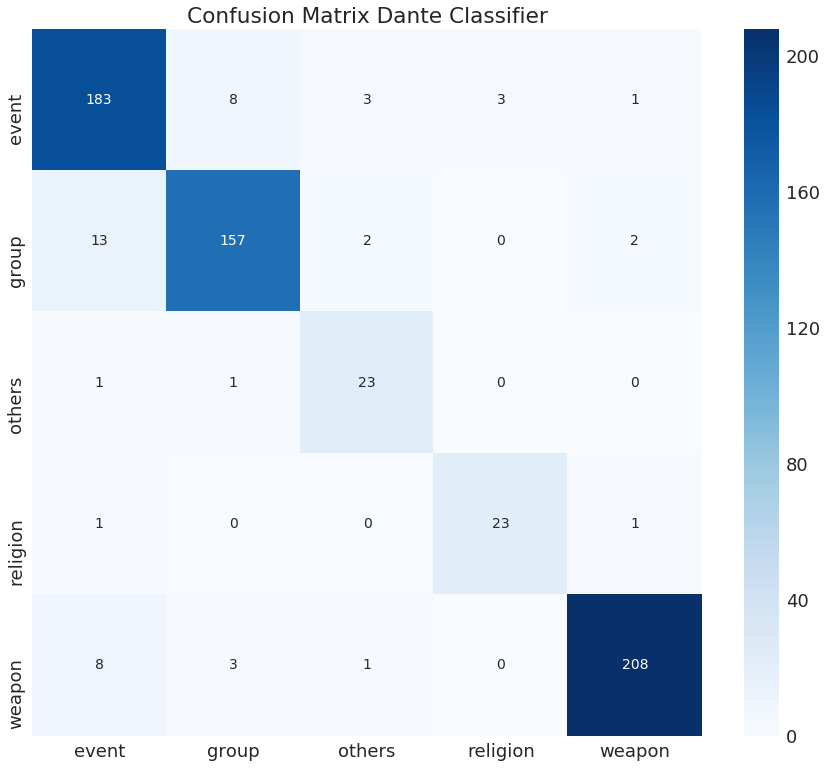

In [3]:
# Parte di codice per la confusion matrix

rootCategory = "root"
dataset["level1_Parent"] = dataset['label1'].apply(lambda x : x.split("/")[0])
dataset["level2_Parent"] = dataset['label2'].apply(lambda x : x.split("/")[0])
dataset["level3_Parent"] = dataset['label3'].apply(lambda x : x.split("/")[0]) 
evaluatedParent = list()
machedParent = list()

for index, row in dataset.iterrows():
    
    if row['parent'] == row['level1_Parent'] or row['parent'] == row['level2_Parent'] or row['parent'] == row['level3_Parent']:
        evaluatedParent.append(row['parent'])
        machedParent.append(1)
    else:
        evaluatedParent.append(row['level1_Parent'])
        machedParent.append(0)



# Compute confusion matrix
cnf_matrix = confusion_matrix(dataset['parent'], evaluatedParent)

print(np.unique(dataset['parent']))

np.set_printoptions(precision=2)    

df_cm = pd.DataFrame(cnf_matrix,index = categories[rootCategory], columns = categories[rootCategory])
plt.figure(figsize = (15,13))
sn.set(font_scale=1.8)
sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size": 14},fmt='g')
plt.title("Confusion Matrix Dante Classifier")
plt.savefig('dante.pdf',bbox_inches='tight')
dataset["match_parent"] = machedParent

unrest_and_threaths
['rebellion' 'religion_and_social_conflict' 'revolution']
[[32  2  3]
 [ 7 24  6]
 [ 2  0 35]]
group
['criminal_organisation' 'religious_extremist' 'social_revolutionary']
[[ 28   2   0]
 [  2 103   9]
 [  3   0  27]]
weapon
['biological_weapon' 'chemical_weapon' 'explosive_weapon' 'nuclear_weapon'
 'offensive_weapon']
[[ 24   1   1   2   0]
 [  2  24   2   0   0]
 [  0   1  25   1   1]
 [  0   3   0  25   0]
 [  1   2   4   1 100]]
offensive_weapon
['gun' 'rifle' 'rocket_launchers']
[[35  1  0]
 [ 2 33  1]
 [ 0  2 34]]
religious_extremist
['christian_adversary' 'islamic_adversary' 'other_religious_adversary']
[[38  0  0]
 [ 3 35  0]
 [ 1  7 30]]
root
['event' 'group' 'others' 'religion' 'weapon']
[[125  50  11   8   4]
 [ 31 131   6   0   6]
 [  0   2  22   1   0]
 [  0   0   2  23   0]
 [ 12  10   5   0 193]]
event
['terrorism_organisational_model' 'terrorist_attack' 'unrest_and_threaths'
 'violence_and_aggression']
[[ 27   0   1   1]
 [  0  27   0   2]
 [  3   3 

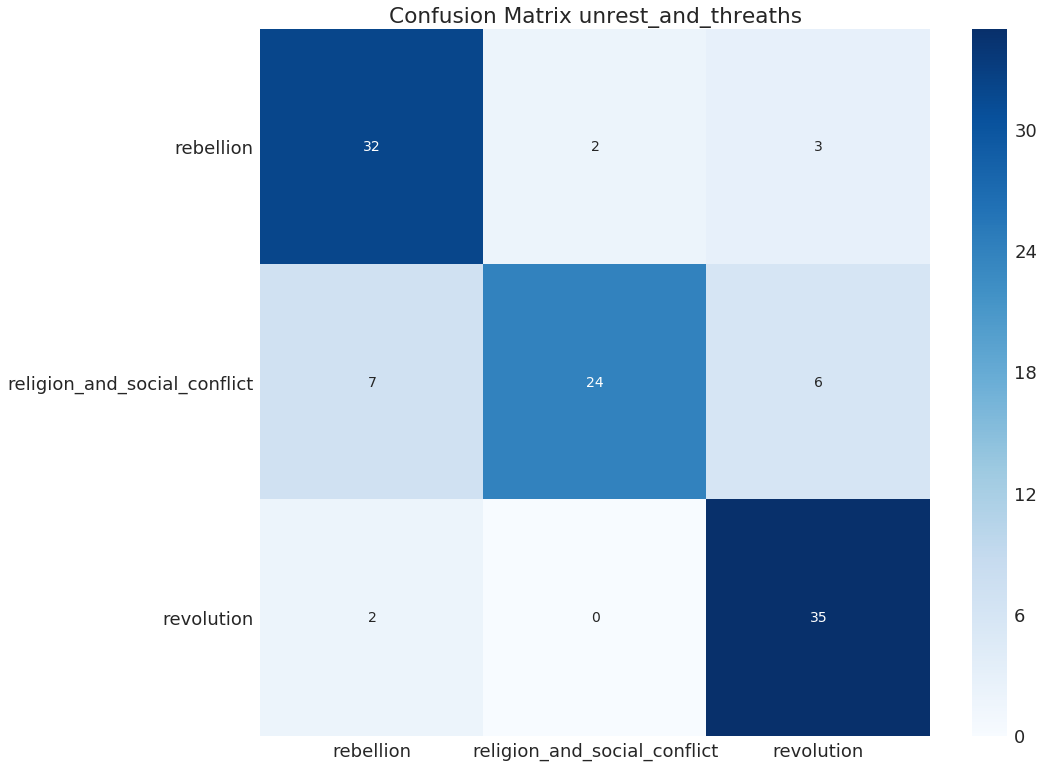

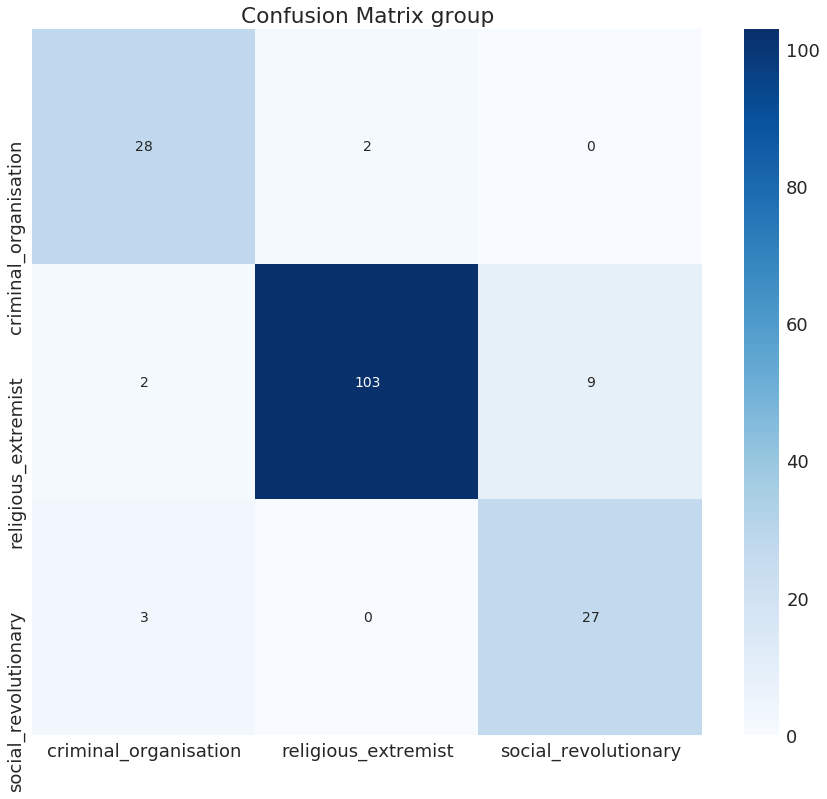

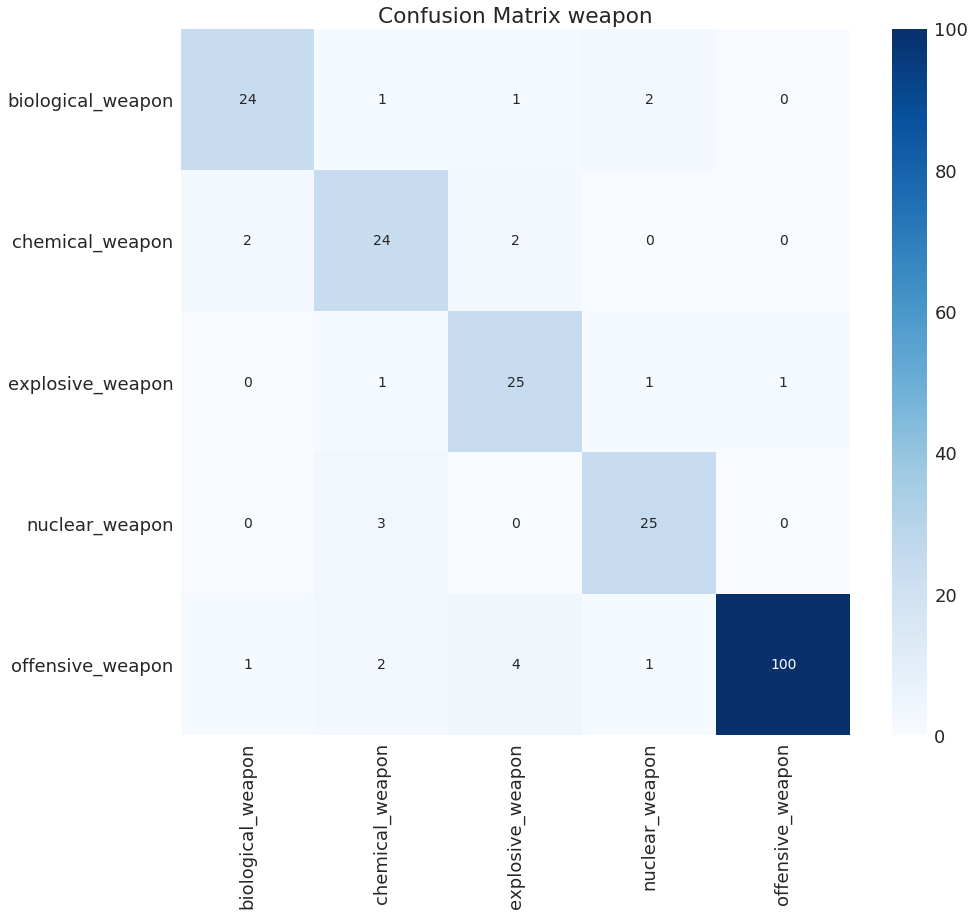

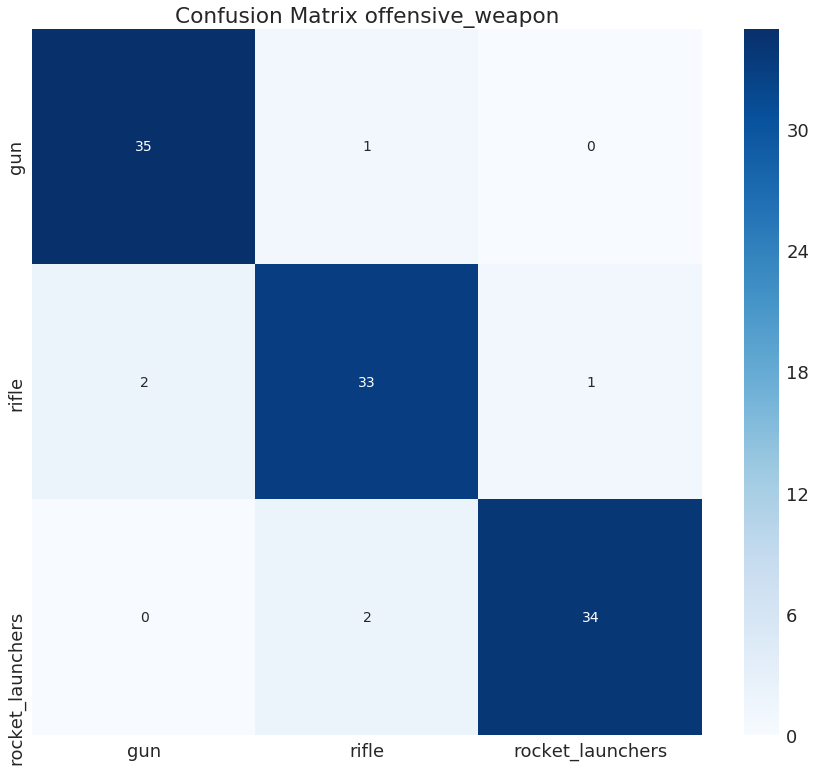

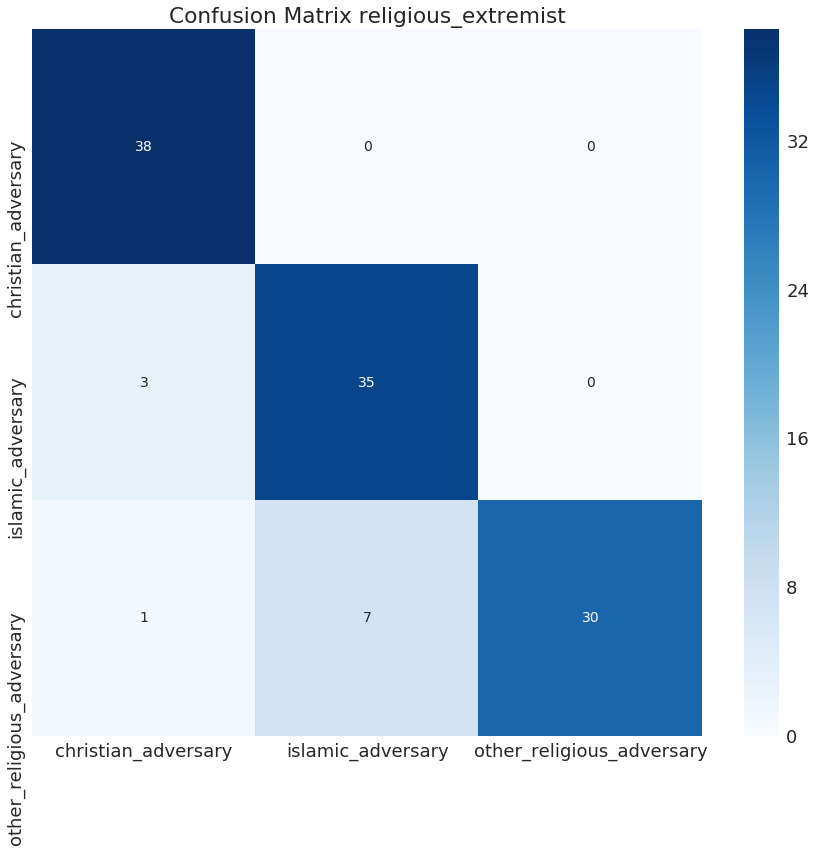

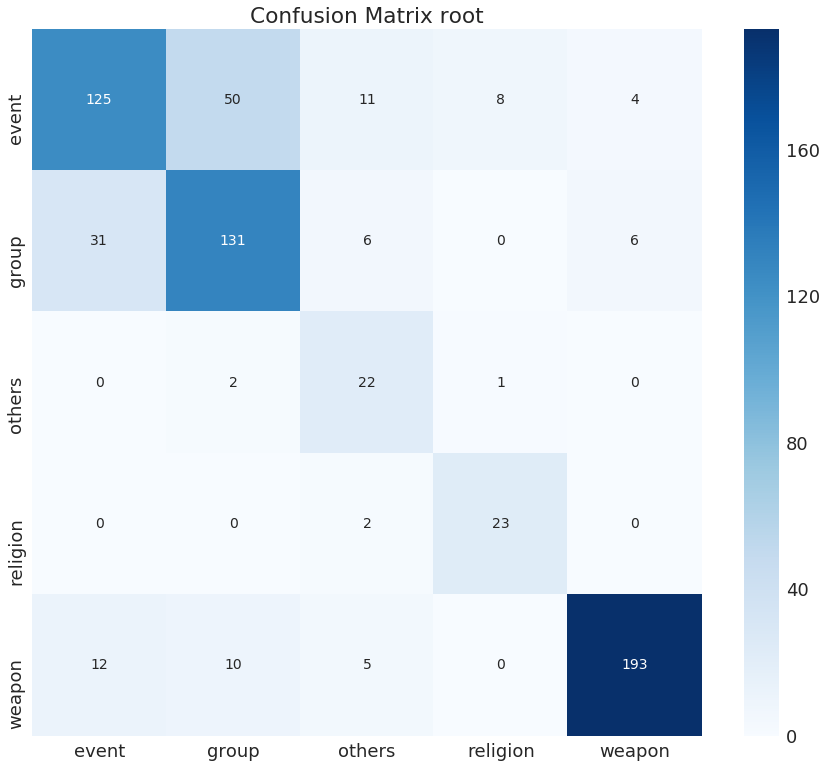

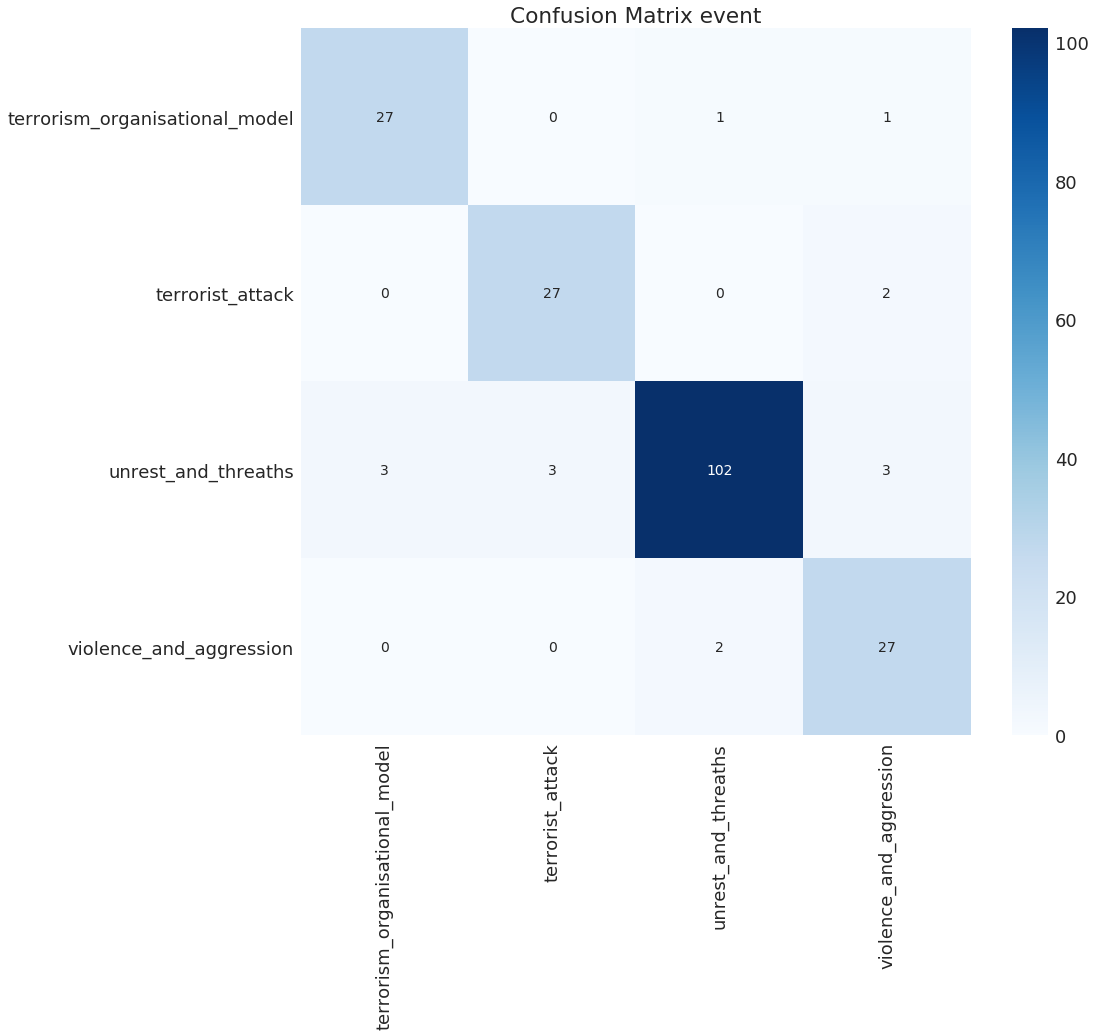

In [4]:
for category in categories:
    
    dataset = pd.read_csv("dante/confusion_matrix/logistic_adam/"+category+".csv").drop("Unnamed: 0",axis=1)
    print(category)
    print(np.unique(dataset['real']))
    cnf_matrix = confusion_matrix(dataset['real'], dataset['evaluated'])
    print(cnf_matrix)
    np.set_printoptions(precision=2)    
    try:
        df_cm = pd.DataFrame(cnf_matrix,index = categories[category], columns = categories[category])
        plt.figure(figsize = (15,13))
        sn.set(font_scale=1.8)
        sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size": 14},fmt='g')
        plt.title("Confusion Matrix "+category)
        plt.savefig('image/dante/logistic_adam/confusion_matrix/'+category+'.pdf',bbox_inches='tight')
    except ValueError:
        print "Oops!  That was no valid number.  Try again..."



In [ ]:
dataset = pd.read_csv("classificationResults.csv").drop("Unnamed: 0",axis=1)

In [ ]:
plt.figure(figsize = (7,7))
plt.boxplot(dataset["time"]*100)
plt.title("Classification Time",fontsize=14)
plt.ylabel("Time (ms)",fontsize=14)
plt.xlabel("Distribution",fontsize=14)

plt.savefig('timeTest.pdf')